In [334]:
import numpy as np
import scipy.signal as spsig
import scipy.interpolate as sinterp
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import PIL
import time

# Pre-defined colormap
top = mpl.cm.get_cmap('Oranges_r', 128)
bottom = mpl.cm.get_cmap('Blues', 128)
newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')



In [287]:
# Parameters

N_pix = 1500  # Total number of pixels
AS_diam = 1200  # Aperture stop diameter [mm]
M1_diam = 395  # Mirror 1 cap stopper diameter [mm]

sp_lenght = 700  # Spider length [mm]
sp_width = 12  # Spider width [mm] 

AS_centre = [0, 0]
M1_centre = [0, 51]

sp1_angle = 106.78 - 90 # [degrees]
sp2_angle = 50.11 - 90 # [degrees]
sp3_angle = -10.76 - 90 # [degrees]

sp1_x_pos = 260  # [mm]
sp1_y_pos = 240  # [mm]
sp2_x_pos = -330  # [mm]
sp2_y_pos = 130  # [mm]
sp3_x_pos = 70  # [mm]
sp3_y_pos = -330  # [mm]


In [288]:
# Build pupil plane

pupil_plane = np.ones((N_pix, N_pix))

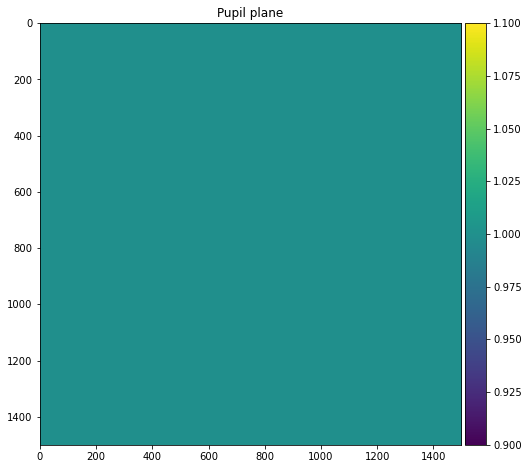

In [289]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)
im1 = ax1.imshow(pupil_plane, interpolation='None')
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')
ax1.set_title('Pupil plane')
plt.show()

In [290]:

# coordinates of map in [mm]
W, H  = np.meshgrid(np.linspace(-m_D//2, m_D//2, N_pix), np.linspace(-m_D//2, m_D//2, N_pix)) 


# W, H  = -1*W , -1*H


# Calculate the Aperture Stop

In [291]:
aperture_stop_mask = np.sqrt((W - AS_centre[0])**2 + (H - AS_centre[1])**2) <= (AS_diam/2)

# aperture_stop_mask = np.sqrt((W - AS_centre[0])**2 + (H - AS_centre[1])**2) <= (AS_diam/2)



In [292]:
pupil_plane[~aperture_stop_mask] = 0

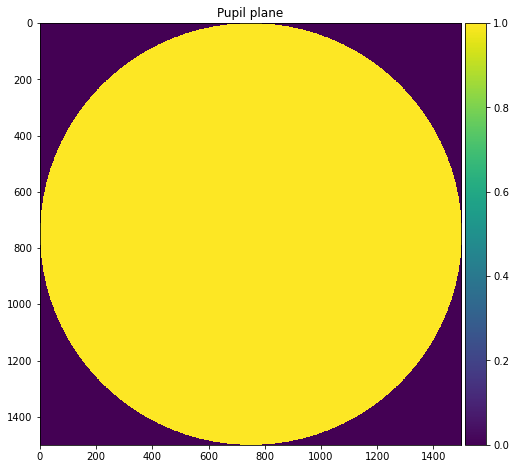

In [293]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)
im1 = ax1.imshow(pupil_plane, interpolation='None')
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')
ax1.set_title('Pupil plane')
plt.show()

# Calculate the Mirror 1 obscuration

In [294]:
M1_mask = np.sqrt((W - M1_centre[0])**2 + (H - M1_centre[1])**2) <= (M1_diam/2)

# M1_mask = np.sqrt((W - M1_centre[0])**2 + (H + M1_centre[1])**2) <= (M1_diam/2)

In [295]:
pupil_plane[M1_mask] = 0

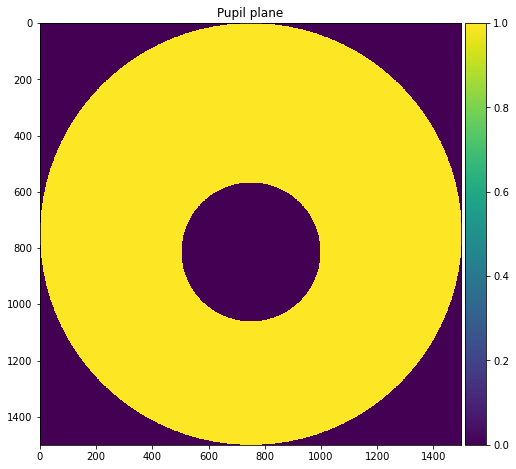

In [296]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)
im1 = ax1.imshow(pupil_plane, interpolation='None')
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')
ax1.set_title('Pupil plane')
plt.show()

# Calculate the spider arms

In [297]:
sp1_angle = 106.78 -90 # [degrees]
sp2_angle = 50.11 -90 # [degrees]
sp3_angle = -10.76 -90 # [degrees]

sp1_x_pos = 260  # [mm]
sp1_y_pos = 240  # [mm]
sp2_x_pos = -330  # [mm]
sp2_y_pos = 130  # [mm]
sp3_x_pos = 70  # [mm]
sp3_y_pos = -330  # [mm]


In [324]:
# Calculate the line parameters

# Spider 1
sp1_a = np.tan(sp1_angle*(np.pi/180))
sp1_b = sp1_y_pos - sp1_a*sp1_x_pos

# sp1_b = sp1_y_pos - np.arctan(np.tan(sp1_angle)*np.tan(sp1_x_pos))
# sp1_a = (sp1_y_pos - sp1_b )/sp1_x_pos

sp1_mask_1 = sp1_a*W + sp1_b - sp_width/2 * np.sqrt(1 + sp1_a**2) < H
sp1_mask_2 = sp1_a*W + sp1_b + sp_width/2 * np.sqrt(1 + sp1_a**2) > H

sp1_mask = np.logical_and(sp1_mask_1, sp1_mask_2)

sp1_length_mask = np.sqrt((W - sp1_x_pos)**2 + (H - sp1_y_pos)**2) <= (sp_lenght/2)
sp1_mask = np.logical_and(sp1_mask, sp1_length_mask)

# sp1_mask = np.sqrt((W - sp1_x_pos)**2 + (H - sp1_y_pos)**2) <= (sp_width/2)
# sp1_b_mask = np.sqrt((W)**2 + (H - sp1_b)**2) <= (sp_width/2)


# Spider 2
sp2_a = np.tan(sp2_angle*(np.pi/180))
sp2_b = sp2_y_pos - sp2_a*sp2_x_pos

# sp2_b = sp2_y_pos - np.arctan(np.tan(sp2_angle)*np.tan(sp2_x_pos))
# sp2_a = (sp2_y_pos - sp2_b )/sp2_x_pos

sp2_mask_1 = sp2_a*W + sp2_b - sp_width/2 * np.sqrt(1 + sp2_a**2) < H
sp2_mask_2 = sp2_a*W + sp2_b + sp_width/2 * np.sqrt(1 + sp2_a**2) > H

sp2_mask = np.logical_and(sp2_mask_1, sp2_mask_2)

sp2_length_mask = np.sqrt((W - sp2_x_pos)**2 + (H - sp2_y_pos)**2) <= (sp_lenght/2)
sp2_mask = np.logical_and(sp2_mask, sp2_length_mask)

# sp2_mask = np.sqrt((W - sp2_x_pos)**2 + (H - sp2_y_pos)**2) <= (sp_width/2)
# sp2_b_mask = np.sqrt((W)**2 + (H - sp2_b)**2) <= (sp_width/2)



# Spider 3
sp3_a = np.tan(sp3_angle*(np.pi/180))
sp3_b = sp3_y_pos - sp3_a*sp3_x_pos

sp3_mask_1 = sp3_a*W + sp3_b - sp_width/2 * np.sqrt(1 + sp3_a**2) < H
sp3_mask_2 = sp3_a*W + sp3_b + sp_width/2 * np.sqrt(1 + sp3_a**2) > H

sp3_mask = np.logical_and(sp3_mask_1, sp3_mask_2)

sp3_length_mask = np.sqrt((W - sp3_x_pos)**2 + (H - sp3_y_pos)**2) <= (sp_lenght/2)
sp3_mask = np.logical_and(sp3_mask, sp3_length_mask)

# sp3_mask = np.sqrt((W - sp3_x_pos)**2 + (H - sp3_y_pos)**2) <= (sp_width/2)
# sp3_b_mask = np.sqrt((W)**2 + (H - sp3_b)**2) <= (sp_width/2)




In [325]:
test_pupil_plane = np.copy(pupil_plane)

In [326]:
test_pupil_plane[sp1_mask] = 0
# test_pupil_plane[sp1_b_mask] = 2

test_pupil_plane[sp2_mask] = 0
# test_pupil_plane[sp2_b_mask] = 10

test_pupil_plane[sp3_mask] = 0
# test_pupil_plane[sp3_b_mask] = 20




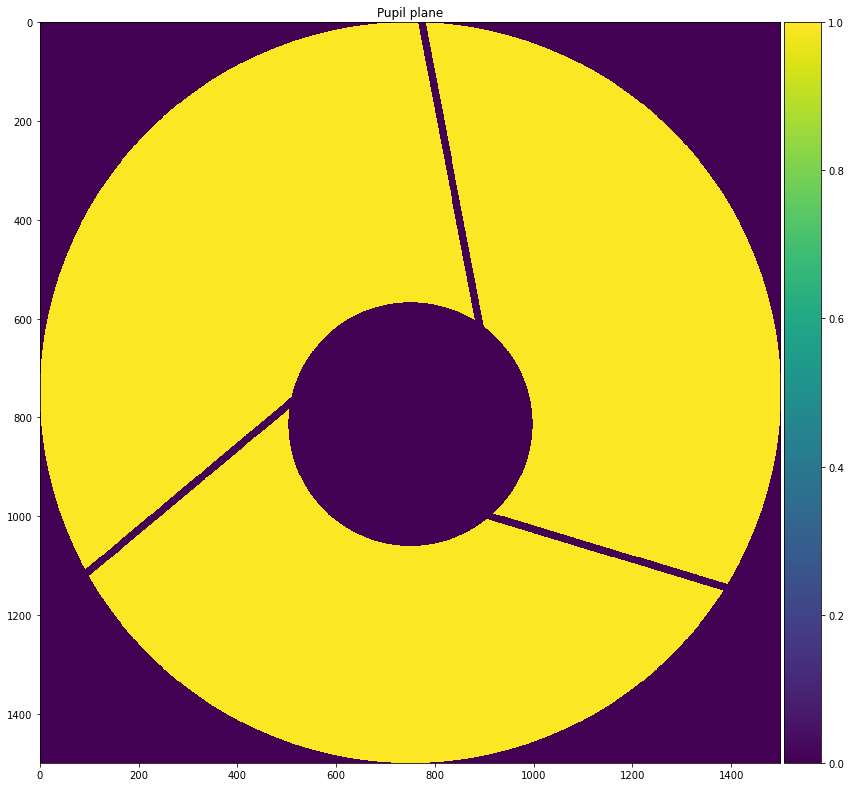

In [328]:
fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(111)
im1 = ax1.imshow(test_pupil_plane, interpolation='None')
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')
ax1.set_title('Pupil plane')
plt.show()

# Low-pass filtering

In [365]:
high_freq_pupil_plane = np.copy(test_pupil_plane)

In [366]:
n_filter = 3
top_hat = np.ones((n_filter, n_filter))

In [367]:
low_freq_pupil_plane = spsig.convolve2d(
    high_freq_pupil_plane, top_hat, boundary='fill', mode='same', fillvalue=0)

low_freq_pupil_plane /= np.max(low_freq_pupil_plane)

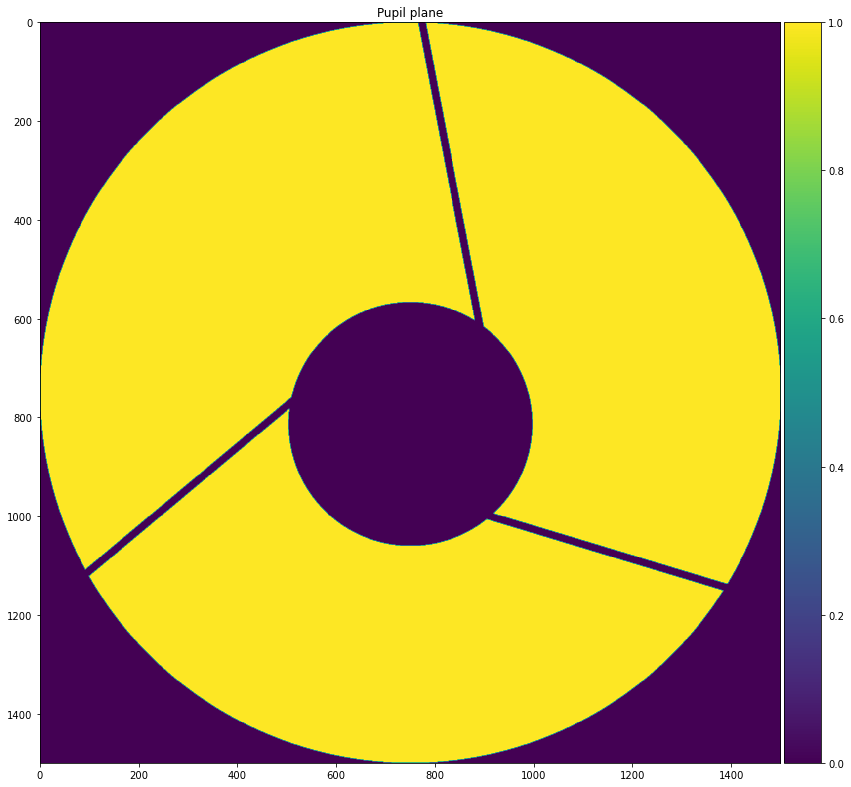

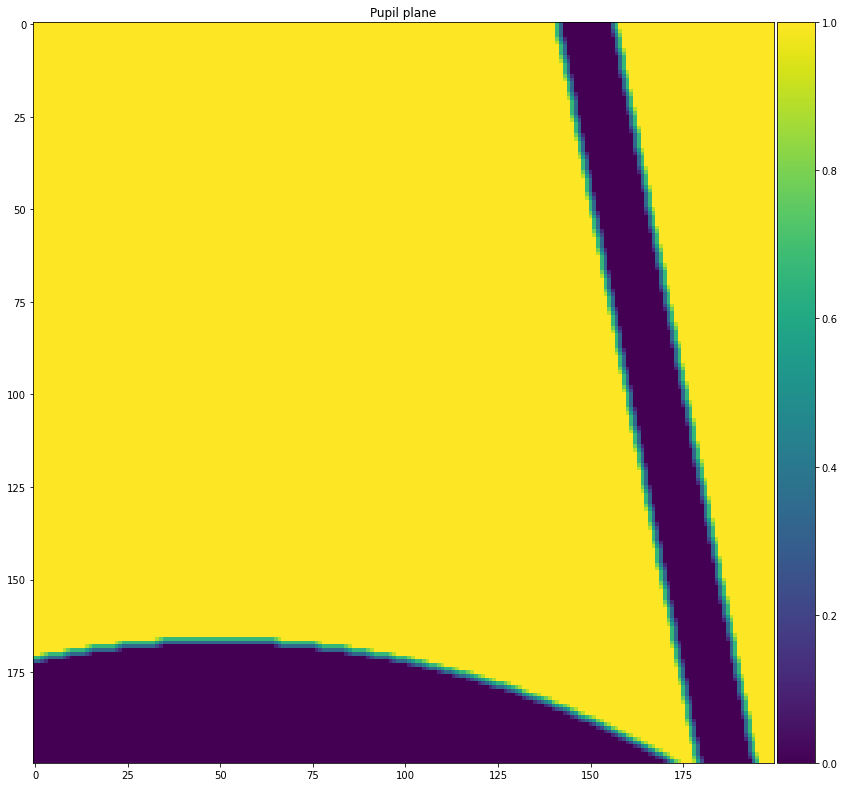

In [368]:
fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(111)
im1 = ax1.imshow(low_freq_pupil_plane, interpolation='None')
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')
ax1.set_title('Pupil plane')
plt.show()

fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(111)
im1 = ax1.imshow(low_freq_pupil_plane[500-100:500+100, 800-100:800+100 ], interpolation='None')
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')
ax1.set_title('Pupil plane')
plt.show()


In [370]:
def generate_pupil_obscurations(N_pix=1024, N_filter=3):
    """Generate Euclid like pupil obscurations.
    
    Simple procedure considering only the 2D plane.
    No 3D projections wrt the angle of the FoV is done.
    
    Parameters
    ----------
    N_pix: int
        Total number of pixels
    N_filter: int
        Length of the low-pass filter [pixels]
        
    """
    # Telescope parameters
    AS_diam = 1200  # Aperture stop diameter [mm]
    M1_diam = 395  # Mirror 1 cap stopper diameter [mm]

    sp_lenght = 700  # Spider length [mm]
    sp_width = 12  # Spider width [mm] 

    AS_centre = [0, 0]
    M1_centre = [0, 51]

    sp1_angle = 106.78 - 90 # [degrees]
    sp2_angle = 50.11 - 90 # [degrees]
    sp3_angle = -10.76 - 90 # [degrees]

    sp1_x_pos = 260  # [mm]
    sp1_y_pos = 240  # [mm]
    sp2_x_pos = -330  # [mm]
    sp2_y_pos = 130  # [mm]
    sp3_x_pos = 70  # [mm]
    sp3_y_pos = -330  # [mm]
    
    
    # Build pupil plane
    pupil_plane = np.ones((N_pix, N_pix))
    
    # coordinates of map in [mm]
    W, H  = np.meshgrid(np.linspace(-m_D//2, m_D//2, N_pix), np.linspace(-m_D//2, m_D//2, N_pix)) 

    
    ### Calculate the Aperture stop and draw it ###
    aperture_stop_mask = np.sqrt((W - AS_centre[0])**2 + (H - AS_centre[1])**2) <= (AS_diam/2) 
    pupil_plane[~aperture_stop_mask] = 0
    
    
    ### Calculate the M1/M2 obscurations and draw them ###
    M1_mask = np.sqrt((W - M1_centre[0])**2 + (H - M1_centre[1])**2) <= (M1_diam/2)
    pupil_plane[M1_mask] = 0
   

    ### Calculate the spiders and draw them ###
     
    # Spider 1
    sp1_a = np.tan(sp1_angle*(np.pi/180))
    sp1_b = sp1_y_pos - sp1_a*sp1_x_pos

    sp1_mask_1 = sp1_a*W + sp1_b - sp_width/2 * np.sqrt(1 + sp1_a**2) < H
    sp1_mask_2 = sp1_a*W + sp1_b + sp_width/2 * np.sqrt(1 + sp1_a**2) > H
    sp1_mask = np.logical_and(sp1_mask_1, sp1_mask_2)

    sp1_length_mask = np.sqrt((W - sp1_x_pos)**2 + (H - sp1_y_pos)**2) <= (sp_lenght/2)
    sp1_mask = np.logical_and(sp1_mask, sp1_length_mask)

    # Spider 2
    sp2_a = np.tan(sp2_angle*(np.pi/180))
    sp2_b = sp2_y_pos - sp2_a*sp2_x_pos

    sp2_mask_1 = sp2_a*W + sp2_b - sp_width/2 * np.sqrt(1 + sp2_a**2) < H
    sp2_mask_2 = sp2_a*W + sp2_b + sp_width/2 * np.sqrt(1 + sp2_a**2) > H
    sp2_mask = np.logical_and(sp2_mask_1, sp2_mask_2)

    sp2_length_mask = np.sqrt((W - sp2_x_pos)**2 + (H - sp2_y_pos)**2) <= (sp_lenght/2)
    sp2_mask = np.logical_and(sp2_mask, sp2_length_mask)

    # Spider 3
    sp3_a = np.tan(sp3_angle*(np.pi/180))
    sp3_b = sp3_y_pos - sp3_a*sp3_x_pos

    sp3_mask_1 = sp3_a*W + sp3_b - sp_width/2 * np.sqrt(1 + sp3_a**2) < H
    sp3_mask_2 = sp3_a*W + sp3_b + sp_width/2 * np.sqrt(1 + sp3_a**2) > H
    sp3_mask = np.logical_and(sp3_mask_1, sp3_mask_2)

    sp3_length_mask = np.sqrt((W - sp3_x_pos)**2 + (H - sp3_y_pos)**2) <= (sp_lenght/2)
    sp3_mask = np.logical_and(sp3_mask, sp3_length_mask)

    # Draw the three spider arms
    pupil_plane[sp1_mask] = 0
    pupil_plane[sp2_mask] = 0
    pupil_plane[sp3_mask] = 0

    
    ### Low-pass filter the image ###
    top_hat_filter = np.ones((N_filter, N_filter))
    
    pupil_plane = spsig.convolve2d(
    pupil_plane, top_hat_filter, boundary='fill', mode='same', fillvalue=0)
    
    pupil_plane /= np.sum(top_hat_filter)
    
    return pupil_plane
    

In [371]:
my_pupil = generate_pupil_obscurations(N_pix=1024, N_filter=3)

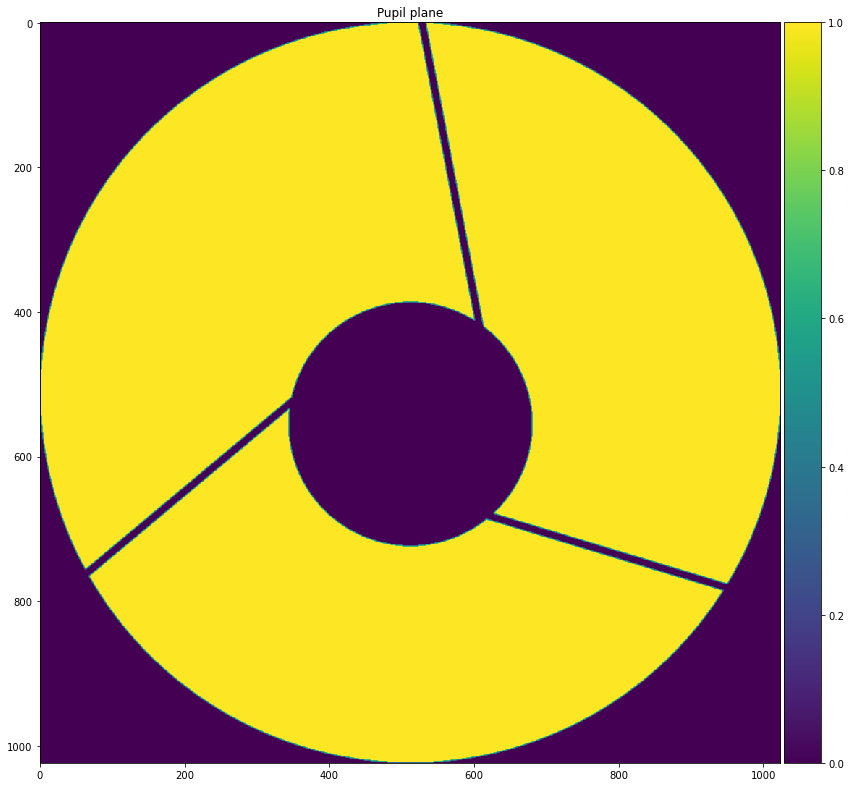

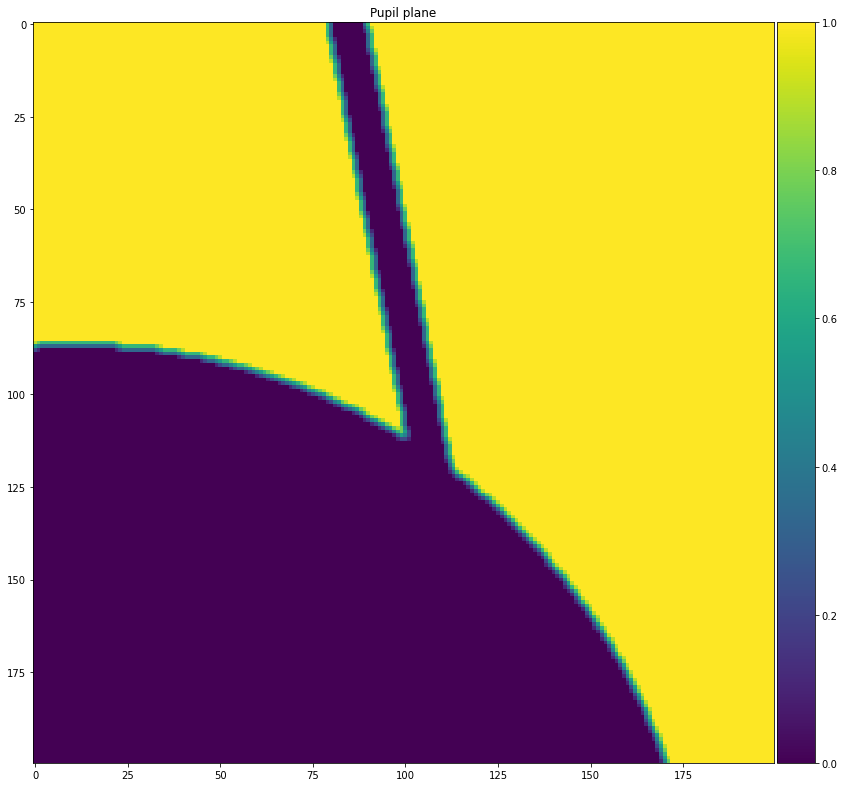

In [373]:
fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(111)
im1 = ax1.imshow(my_pupil, interpolation='None')
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')
ax1.set_title('Pupil plane')
plt.show()

fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(111)
im1 = ax1.imshow(my_pupil[400-100:400+100, 600-100:600+100 ], interpolation='None')
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')
ax1.set_title('Pupil plane')
plt.show()